In [1]:
!pip install pyspellchecker

   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.2 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.2 MB 1.1 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.2 MB 1.1 MB/s eta 0:00:06
   ------- -------------------------------- 1.3/7.2 MB 907.1 kB/s eta 0:00:07
   ------- -------------------------------- 1.3/7.2 MB 907.1 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.2 MB 856.1 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.2 MB 856.1 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.2 MB 856.1 kB/s eta 0:00:07
   ---------- ----------------------------- 1.8/7.2 MB 719.2 kB/s eta 0:00:08
   ---------- --------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import nltk
import re
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ModuleNotFoundError: No module named 'seaborn'

In [8]:
, encoding='latin-1'

"encoding='latin-1'"

In [17]:
dataset = pd.read_csv('spam.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
dataset = dataset.rename(columns={'Category': 'label', 'Message': 'text'})
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
for i in range(len(dataset)):
  if dataset['label'][i] == 'ham':
    dataset['label'][i] = 1
  else:
    dataset['label'][i] = 0

dataset.head()

/tmp/ipython-input-4228171363.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['label'][i] = 1
/tmp/ipython-input-4228171363.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values 

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Spam:  747
Ham:  4825


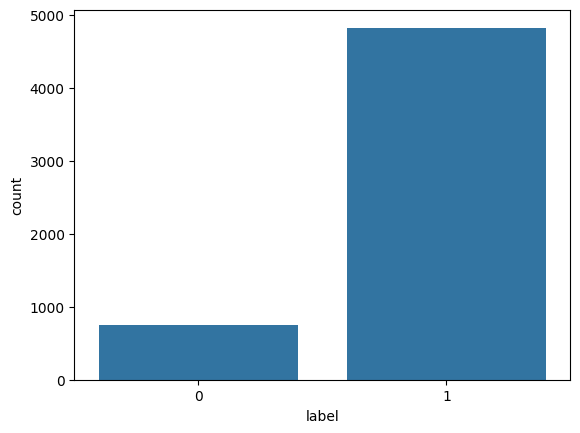

In [22]:
sns.countplot(data = dataset, x = 'label')
print('Spam: ',(dataset['label'] == 0 ).sum())
print('Ham: ', (dataset['label'] == 1 ).sum())

In [23]:
df_majority = dataset[dataset['label'] == 1]
df_minority = dataset[dataset['label'] == 0]

df_minority_upsample = resample(df_minority, replace=True, n_samples=4825, random_state=42)
dataset_upsample = pd.concat([df_majority, df_minority_upsample])
dataset_upsample.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
6,1,Even my brother is not like to speak with me. ...


label
1    4825
0    4825
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

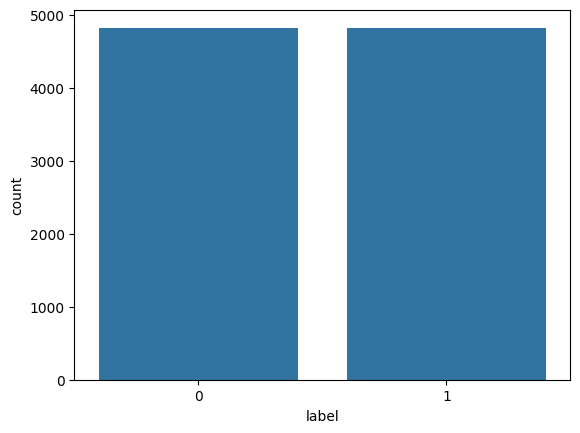

In [24]:
print(dataset_upsample['label'].value_counts())
sns.countplot(data = dataset_upsample, x = 'label')

In [28]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
import nltk
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text_lower = text.lower()
  tokens = nltk.word_tokenize(text_lower)
  stopwords = nltk.corpus.stopwords.words('english')
  filtered_tokens = [token for token in tokens if token not in stopwords]
  processed_text = ' '.join(filtered_tokens)
  return processed_text

dataset_upsample['cleaned_text'] = dataset_upsample['text'].apply(preprocess_text)
dataset_upsample.head()

,label,text,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,1,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
6,1,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent


In [30]:
dataset_upsample['label'] = dataset_upsample['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(dataset_upsample['cleaned_text'], dataset_upsample['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [32]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9875647668393782
Confusion Matrix:
 [[932  13]
 [ 11 974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.99      0.99      0.99       985

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

